In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv("Obesity.csv")
display(dataset.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
print(dataset.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [12]:
print(f"\n Il dataset contiene {dataset.shape[0]} osservazioni e {dataset.shape[1]} variabili.\n")


 Il dataset contiene 2114 osservazioni e 17 variabili.



In [63]:
dataset.rename(columns={"FAVC": "High_Caloric_Food", 
                        "FCVC": "VegetableConsumption", 
                        "NCP": "Main_Meals_Per_Day", 
                        "CAEC": "Food_Between_Meals", 
                        "CH2O": "Water_Intake", 
                        "SCC": "Calorie_Monitoring", 
                        "FAF": "Physical_Activity_Frequency", 
                        "TUE": "Tech_use_Time", 
                        "CALC": "Alcohol_Consumption", 
                        "MTRANS": "Transport_Mode", 
                        "NObeyesdad": "Obesity_Level",}, inplace=True)
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'High_Caloric_Food', 'VegetableConsumption', 'Main_Meals_Per_Day',
       'Food_Between_Meals', 'SMOKE', 'Water_Intake', 'Calorie_Monitoring',
       'Physical_Activity_Frequency', 'Tech_use_Time', 'Alcohol_Consumption',
       'Transport_Mode', 'Obesity_Level'],
      dtype='object')

In [64]:
print(f"\n Valori Mancanti per ogni variabile\n")
missing_values = dataset.isna().sum()
missing_values


 Valori Mancanti per ogni variabile



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
VegetableConsumption              0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               5
Transport_Mode                    0
Obesity_Level                     1
dtype: int64

In [66]:
missing_values_percent = (missing_values/len(dataset))*100
missing_values_table = pd.DataFrame({"Valori Mancanti": missing_values, "% del totale": missing_values_percent})
display(missing_values_table[missing_values_table["Valori Mancanti"] > 0])

print(f"\n Valori mancanti Consumo Alcolici\n")
dataset[dataset["Alcohol_Consumption"].isna()] 

,Valori Mancanti,% del totale
Alcohol_Consumption,5,0.236518
Obesity_Level,1,0.047304



 Valori mancanti Consumo Alcolici



,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,VegetableConsumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,Water_Intake,Calorie_Monitoring,Physical_Activity_Frequency,Tech_use_Time,Alcohol_Consumption,Transport_Mode,Obesity_Level
13,Male,41.0,1.80,99.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,NaN,Automobile,Obesity_Type_I
94,Female,24.0,1.60,48.0,no,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,NaN,Public_Transportation,Normal_Weight
162,Female,21.0,1.63,60.0,yes,yes,3.0,3.0,Always,yes,2.0,no,2.0,0.0,NaN,Public_Transportation,Normal_Weight
278,Female,32.0,1.57,57.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,NaN,Automobile,Normal_Weight
463,Male,17.0,1.80,68.0,yes,no,2.0,3.0,Sometimes,no,1.0,no,2.0,1.0,NaN,Public_Transportation,Normal_Weight


In [67]:
print(f"\n Valori mancanti livello Obesità\n")
dataset[dataset["Obesity_Level"].isna()] 


 Valori mancanti livello Obesità



,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,VegetableConsumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,Water_Intake,Calorie_Monitoring,Physical_Activity_Frequency,Tech_use_Time,Alcohol_Consumption,Transport_Mode,Obesity_Level
376,Female,36.0,1.58,60.0,yes,no,3.0,3.0,Sometimes,no,1.0,no,2.0,0.0,Sometimes,Automobile,NaN


In [70]:
print(f"\n Gestione valori mancanti\n")
#da scegliere tra due strategie: rimozione (dataset.dropna()) o imputazione (dataset.fillna(value)) 
#nel primo caso eliminiamo tutte le righe che presentano dei valori mancanti (adatto quando ci sono pochi valori mancanti)
#nel secondo caso sostituiamo i valori mancanti con un valore (es: media, mediana, ecc...) (adatto quando non si vogliono perdere dati ed è possibile stimare il valori mancanti)
dataset_clean = dataset.dropna()
missing_values = dataset_clean.isna().sum()
missing_values


 Gestione valori mancanti



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
VegetableConsumption              0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               0
Transport_Mode                    0
Obesity_Level                     0
dtype: int64

In [71]:
print("\n Univariate Data Description \n")

var_numeriche = dataset_clean.select_dtypes(include=["int64", "float64"]).columns
var_categoriche = dataset_clean.select_dtypes(exclude=["int64", "float64"]).columns
print(f"\n Variabili numeriche: {list(var_numeriche)} \n")
print(f"\n Variabili categoriche: {list(var_categoriche)} \n")




 Univariate Data Description 


 Variabili numeriche: ['Age', 'Height', 'Weight', 'VegetableConsumption', 'Main_Meals_Per_Day', 'Water_Intake', 'Physical_Activity_Frequency', 'Tech_use_Time'] 


 Variabili categoriche: ['Gender', 'family_history_with_overweight', 'High_Caloric_Food', 'Food_Between_Meals', 'SMOKE', 'Calorie_Monitoring', 'Alcohol_Consumption', 'Transport_Mode', 'Obesity_Level'] 



In [72]:
print("\n Descriptive Statistic: \n")
stats = dataset_clean[var_numeriche].describe().T
stats.rename(columns={'50%': 'median'}, inplace=True)
display(stats)


 Descriptive Statistic: 



,count,mean,std,min,25%,median,75%,max
Age,2108.0,24.297195,6.332283,14.00,19.931667,22.771307,26.000000,61.00
Height,2108.0,1.701801,0.093227,1.45,1.630000,1.700563,1.768450,1.98
Weight,2108.0,86.609750,26.196130,39.00,65.815202,83.000000,107.501904,173.00
VegetableConsumption,2108.0,2.417277,0.534778,1.00,2.000000,2.381934,3.000000,3.00
Main_Meals_Per_Day,2108.0,2.685753,0.779051,1.00,2.658599,3.000000,3.000000,4.00
Water_Intake,2108.0,2.008730,0.613066,1.00,1.587615,2.000000,2.480347,3.00
Physical_Activity_Frequency,2108.0,1.008891,0.850375,0.00,0.121230,1.000000,1.662348,3.00
Tech_use_Time,2108.0,0.659277,0.608730,0.00,0.000000,0.627973,1.000000,2.00


In [73]:
print("\n Tabelle di frequenza: \n")
for var in var_categoriche:
    print(f"\nFrequenze per '{var}':")
    print(dataset_clean[var].value_counts())
    print("-" * 40)


 Tabelle di frequenza: 


Frequenze per 'Gender':
Gender
Male      1067
Female    1041
Name: count, dtype: int64
----------------------------------------

Frequenze per 'family_history_with_overweight':
family_history_with_overweight
yes    1722
no      386
Name: count, dtype: int64
----------------------------------------

Frequenze per 'High_Caloric_Food':
High_Caloric_Food
yes    1864
no      244
Name: count, dtype: int64
----------------------------------------

Frequenze per 'Food_Between_Meals':
Food_Between_Meals
Sometimes     1763
Frequently     242
Always          52
no              51
Name: count, dtype: int64
----------------------------------------

Frequenze per 'SMOKE':
SMOKE
no     2065
yes      43
Name: count, dtype: int64
----------------------------------------

Frequenze per 'Calorie_Monitoring':
Calorie_Monitoring
no     2012
yes      96
Name: count, dtype: int64
----------------------------------------

Frequenze per 'Alcohol_Consumption':
Alcohol_Consumption
Some


 Distribuzioni delle variabili numeriche: 


 Istogrammi: 



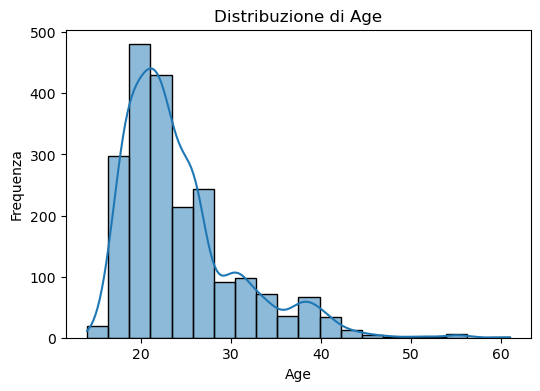

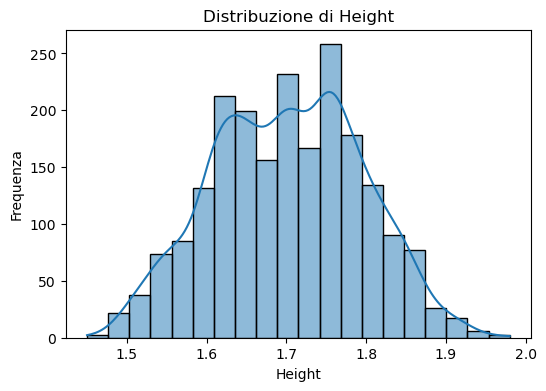

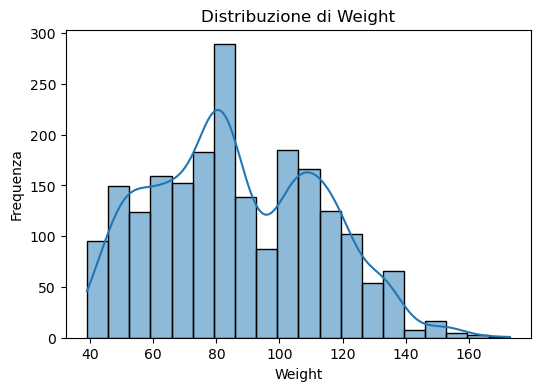

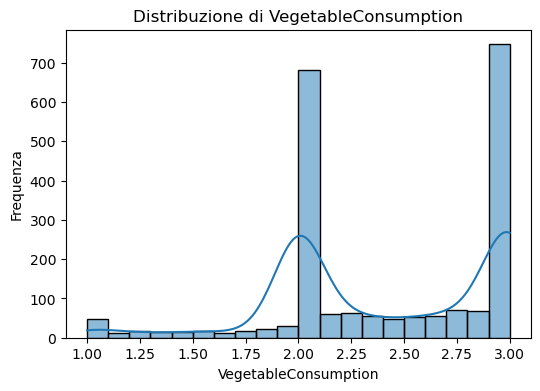

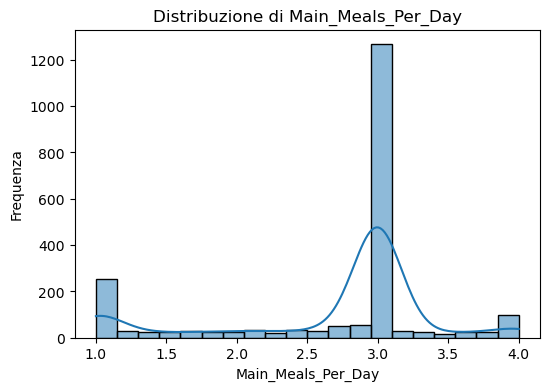

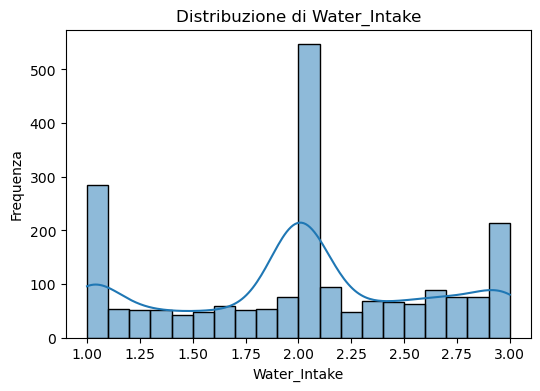

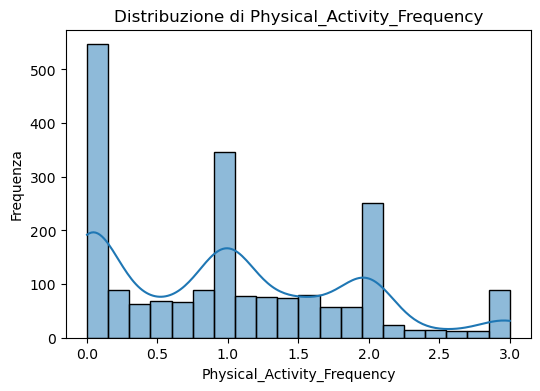

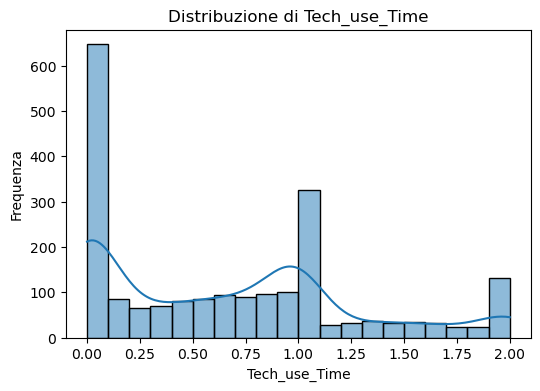

In [74]:
print("\n Distribuzioni delle variabili numeriche: \n")
print("\n Istogrammi: \n")
for var in var_numeriche:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset_clean[var], kde=True, bins=20)
    plt.title(f"Distribuzione di {var}")
    plt.xlabel(var)
    plt.ylabel("Frequenza")
    plt.show()


 Boxplot: 



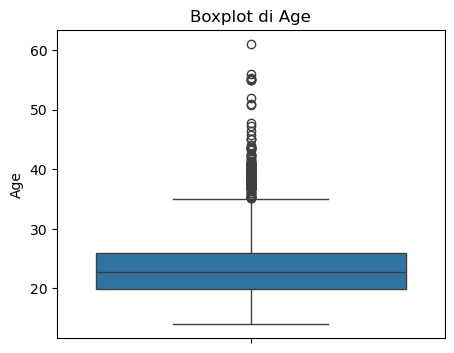

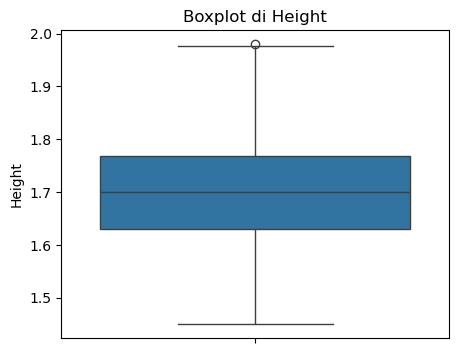

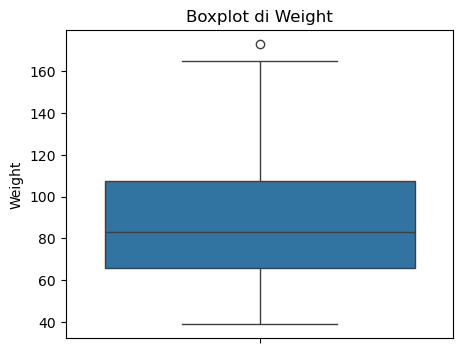

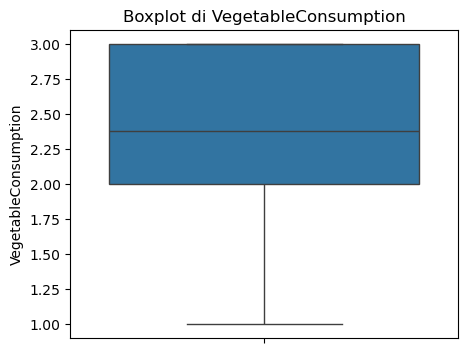

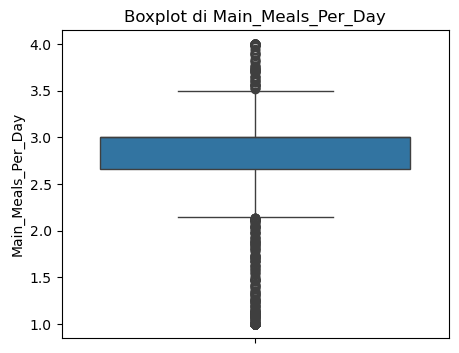

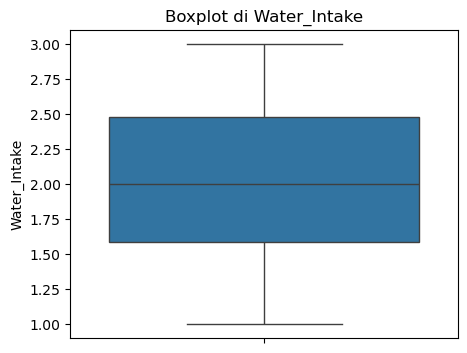

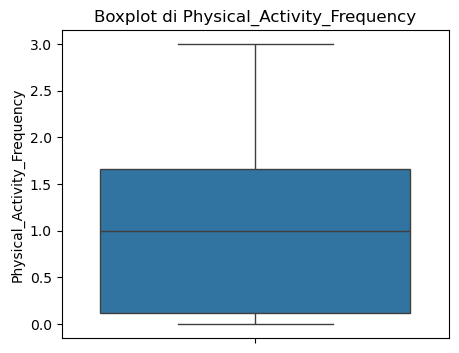

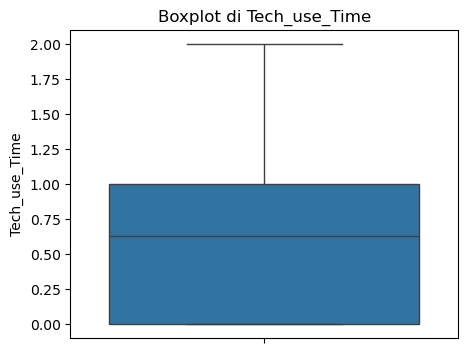

In [75]:
print("\n Boxplot: \n")
for var in var_numeriche:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=dataset_clean[var])
    #plt.boxplot(dataset_clean[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), medianprops=dict(color='red', linewidth=2))
    plt.title(f"Boxplot di {var}")
    plt.ylabel(var)
    plt.show()


 Distribuzioni delle variabili numeriche: 



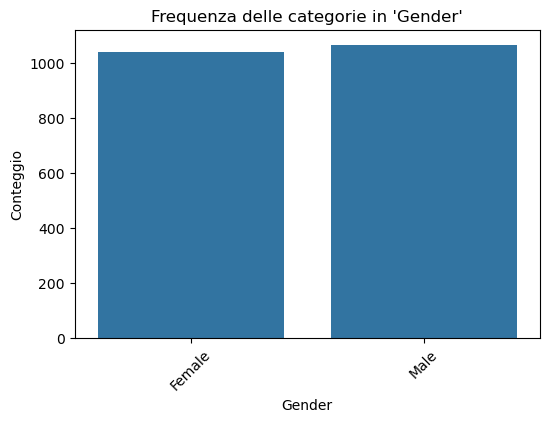

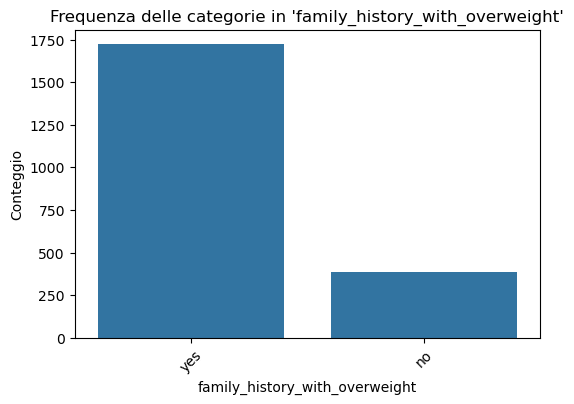

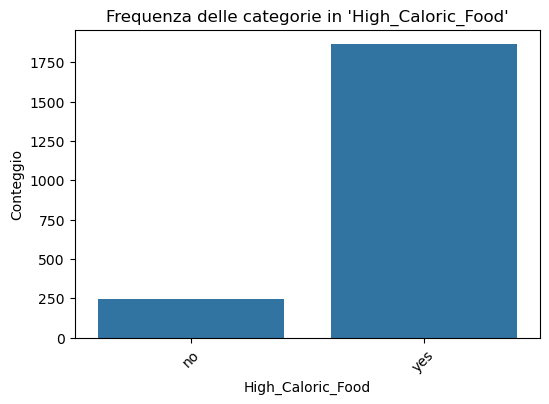

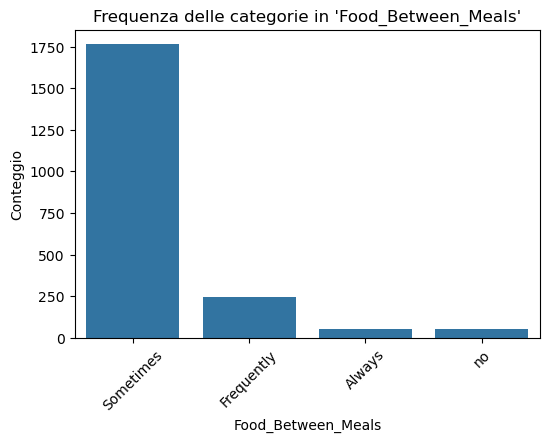

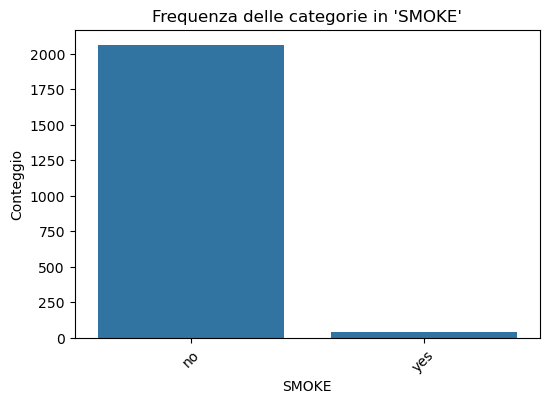

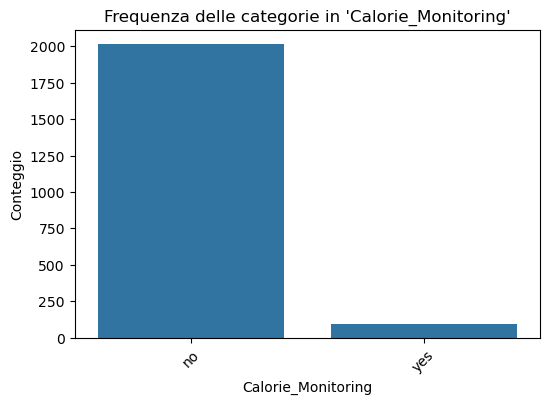

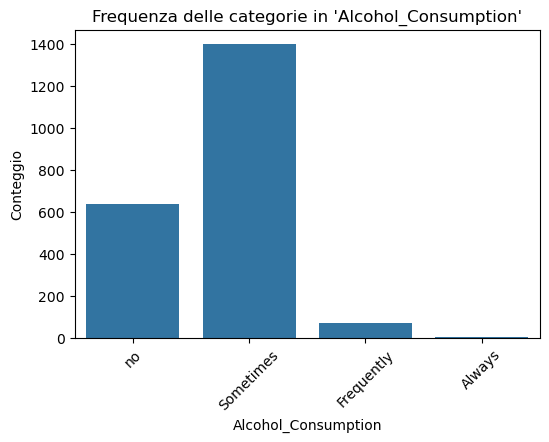

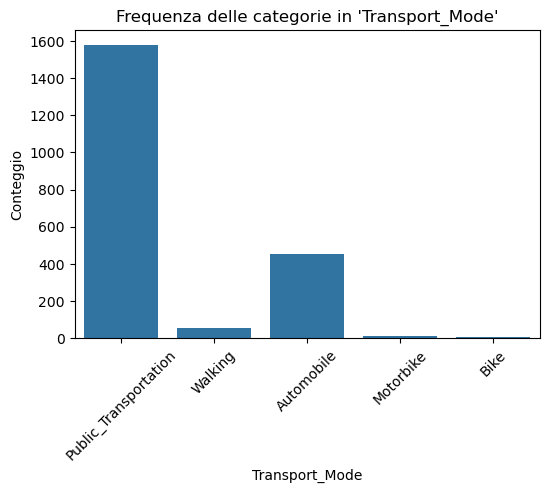

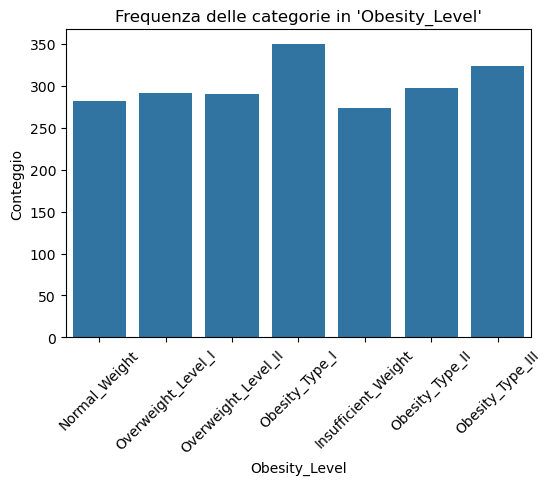

In [76]:
print("\n Distribuzioni delle variabili numeriche: \n")
for var in var_categoriche:
    plt.figure(figsize=(6,4))
    sns.countplot(x=dataset_clean[var])
    plt.title(f"Frequenza delle categorie in '{var}'")
    plt.xlabel(var)
    plt.ylabel("Conteggio")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
ciao